# Christmas recipes

* data set from kaggle: https://www.kaggle.com/gjbroughton/christmas-recipes
* This JSON lines file contains 1600 christmas cooking recipes scraped from BBC Good Food.
* The file contains:
    - Recipe Title
    - Recipe Description
    - Recipe Author
    - Ingredients list
    - Step by step method

In [2]:
import pandas as pd

In [3]:
df = pd.read_json('christmas_recipes.json', lines=True) #without lines=True, I got ValueError: trailing data
df.head()

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


In [4]:
df.describe()

,Name,url,Description,Author,Ingredients,Method
count,1617,1617,1429,1611,1617,1617
unique,1608,1617,1428,93,1617,1617
top,Creamy bread & onion sauce,https://www.bbcgoodfood.com/recipes/2793/chris...,A perfect veggie main that goes brilliantly wi...,Good Food,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
freq,2,1,2,455,1,1


In [5]:
#check missing values

df.isnull().sum()

Name             0
url              0
Description    188
Author           6
Ingredients      0
Method           0
dtype: int64

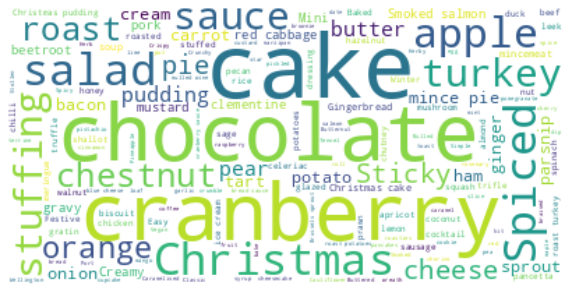

In [6]:
import os
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text =" ".join(title for title in df.Name)

wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
# display the rows with missing authors

df_noauthor = df[df['Author'].isnull()]
df_noauthor

,Name,url,Description,Author,Ingredients,Method
178,Eggnog,https://www.bbcgoodfood.com/recipes/eggnog,"Add cinnamon, and please please please don't s...",None,"[50g caster sugar, 4 egg yolks, 1 tsp vanilla ...",[Put the sugar in a saucepan with 75ml water. ...
195,"Sausage, sage & onion stuffing",https://www.bbcgoodfood.com/recipes/3056/sausa...,So easy to make and devine to eat. Had loads l...,None,"[2 onions, sliced, 25g butter, 1 small Bramley...","[Fry 2 sliced onions in 25g butter for 5 mins,..."
321,Pea & ham soup,https://www.bbcgoodfood.com/recipes/2806665/pe...,Cooked for lunch today using ham stock from th...,None,"[knob of butter, 1 onion, chopped, 1 medium po...",[Heat a knob of butter in a saucepan and when ...
386,Classic trifle,https://www.bbcgoodfood.com/recipes/155633/rub...,"I made this on Christmas eve, it was such a fa...",None,"[750g frozen summer fruit(raspberries, blackbe...",[Put 750g frozen summer fruit in a pan with 20...
468,Super-simple fruitcake,https://www.bbcgoodfood.com/recipes/super-simp...,The olive oil is wrong for this recipe; it has...,None,"[175ml olive oil, plus extra for greasing, 100...",[Heat oven to 160C/140C fan/ gas 3. Grease and...
784,Lamb & cranberry tagine,https://www.bbcgoodfood.com/recipes/lamb-cranb...,I halved the recipe but used a whole can of to...,None,"[1½ kg lamb shoulder, trimmed of excess fat, t...","[At least 3 hrs before (or preferably a day), ..."


In [8]:
df_train = df[df['Author'].notna()]
df_train.tail()

,Name,url,Description,Author,Ingredients,Method
1612,Flavoured butters,https://www.bbcgoodfood.com/recipes/1911/flavo...,Try these different flavoured butters melted o...,Maxine Clark,"[100g softened butter, 2-3 tbsp chopped fresh ...",[Take100g/4oz softened butter and beat until c...
1613,Crispy Roast Duck,https://www.bbcgoodfood.com/recipes/3248/crisp...,"Duck basted to perfection, ideal for a Sunday ...",Ruth Watson,"[3 medium-sized duckss (each about 2¼kg/5lb), ...",[Remove the duck’s giblets and wash them. Cut ...
1614,Smoked salmon kedgeree,https://www.bbcgoodfood.com/recipes/3047/smoke...,This kedgeree is totally delicious. Treat ever...,Barney Desmazery,"[300g basmati rice, 8 eggs, 400g pack sliced s...","[To make the sauce, heat the butter in a large..."
1615,Spicy potted crab,https://www.bbcgoodfood.com/recipes/1797/spicy...,An ideal elegant starter for a wedding,Merrilees Parker,"[6 x 250g pkts unsalted butter, 2 tsp hot chil...",[ Heat the butter in a pan until melted. Turn ...
1616,Sage and Onion Sauce,https://www.bbcgoodfood.com/recipes/3250/sage-...,A great accompaniment to roast duck that can b...,Ruth Watson,"[all the innards, wings and bones from the duc...",[Preheat the oven to 230C/Gas 8/fan oven 210C....


In [9]:
# check data of one missing author by index

# df_train.loc[178] # `KeyError: 178`
df_train.loc[179]

Name                                            Rocky robin cake
url            https://www.bbcgoodfood.com/recipes/889664/roc...
Description    Get creative with your Christmas cake icing - ...
Author                                                Sarah Cook
Ingredients    [1 x 20cm round or 18cm square Christmas cake(...
Method         [Sit the cake on a large board or flat serving...
Name: 179, dtype: object

<AxesSubplot:>

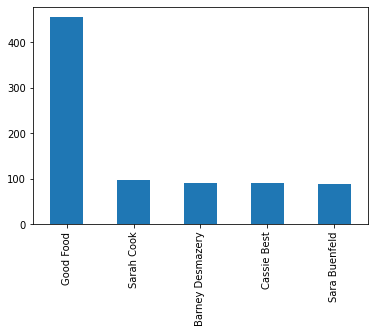

In [10]:
# plot top 5 authors

df_train['Author'].value_counts()[:5].plot(kind='bar')

## Text processing

In [13]:
import texthero

The `texthero clean` pipeline:
- fillna(s) Replace not assigned values with empty spaces.
- lowercase(s) Lowercase all text.
- remove_digits() Remove all blocks of digits.
- remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
- remove_diacritics() Remove all accents from strings.
- remove_stopwords() Remove all stop words.
- remove_whitespace() Remove all white space between words.


In [15]:
df_train['Name_clean'] = texthero.clean(df_train['Name'])
df_train.head()

/tmp/ipykernel_18599/1702269153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Name_clean'] = texthero.clean(df_train['Name'])


,Name,url,Description,Author,Ingredients,Method,Name_clean
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...,christmas pie
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an...",simmer stir christmas cake
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che...",christmas cupcakes
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...,christmas buns
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...,christmas cupcakes


In [20]:
df_train['Description_clean'] = texthero.clean(df_train['Description'])
df_train.head()

/tmp/ipykernel_18599/1380344080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Description_clean'] = texthero.clean(df_train['Description'])


,Name,url,Description,Author,Ingredients,Method,Name_clean,tfidf,Description_clean
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...,christmas pie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",combine key christmas flavours make pie childr...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an...",simmer stir christmas cake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",easy make alternative traditional christmas ca...
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che...",christmas cupcakes,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",beautiful classy little cakes make lovely gift...
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...,christmas buns,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",paul hollywood fruit rolls made ahead heated a...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...,christmas cupcakes,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",made second time today say turned great got la...


## Models

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(df_train['Name_clean'])
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)

In [48]:
input_sequences = []

for line in df_train['Name_clean']:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

input_sequences

[[1, 23],
 [694, 266],
 [694, 266, 1],
 [694, 266, 1, 2],
 [1, 114],
 [1, 267],
 [1, 114],
 [1, 268],
 [1, 695],
 [1, 228],
 [1, 696],
 [1, 697],
 [1, 698],
 [387, 198],
 [387, 198, 1],
 [387, 198, 1, 81],
 [229, 699],
 [229, 699, 1],
 [229, 699, 1, 2],
 [1, 475],
 [1, 475, 319],
 [320, 161],
 [320, 161, 1],
 [320, 161, 1, 162],
 [1, 13],
 [1, 13, 230],
 [1, 13, 230, 115],
 [199, 57],
 [199, 57, 1],
 [199, 57, 1, 2],
 [700, 701],
 [700, 701, 1],
 [700, 701, 1, 2],
 [476, 1],
 [476, 1, 2],
 [702, 1],
 [702, 1, 5],
 [702, 1, 5, 163],
 [57, 269],
 [57, 269, 1],
 [57, 269, 1, 2],
 [50, 1],
 [50, 1, 13],
 [477, 92],
 [477, 92, 1],
 [477, 92, 1, 2],
 [1, 13],
 [1, 13, 82],
 [1, 13],
 [1, 13, 103],
 [116, 1],
 [116, 1, 13],
 [1, 13],
 [1, 13, 58],
 [1, 13, 58, 14],
 [1, 10],
 [1, 10, 11],
 [1, 10, 11, 21],
 [1, 14],
 [1, 14, 703],
 [478, 704],
 [478, 704, 1],
 [478, 704, 1, 131],
 [1, 104],
 [1, 104, 58],
 [1, 104, 58, 14],
 [705, 1],
 [705, 1, 24],
 [93, 200],
 [93, 200, 1],
 [93, 200, 1, 68

In [49]:
# Pad sequences so that they have the same length
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences

array([[  0,   0,   0, ...,   0,   1,  23],
       [  0,   0,   0, ...,   0, 694, 266],
       [  0,   0,   0, ..., 694, 266,   1],
       ...,
       [  0,   0,   0, ..., 124, 340, 197],
       [  0,   0,   0, ...,   0,  75,  45],
       [  0,   0,   0, ...,  75,  45,   7]], dtype=int32)

In [50]:
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [51]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) 
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.1))
model.add(Dense(total_words, activation='softmax'))

earlystop = EarlyStopping(monitor='accuracy', patience=3)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 9, 100)            130200    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1302)              261702    
                                                                 
Total params: 552,702
Trainable params: 552,702
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(xs, ys, epochs=50)

Epoch 1/50
138/138 [==============================] - 3s 10ms/step - loss: 6.6681 - accuracy: 0.0184
Epoch 2/50
138/138 [==============================] - 1s 10ms/step - loss: 6.2464 - accuracy: 0.0231
Epoch 3/50
138/138 [==============================] - 2s 12ms/step - loss: 6.1458 - accuracy: 0.0222
Epoch 4/50
138/138 [==============================] - 1s 10ms/step - loss: 6.0555 - accuracy: 0.0254
Epoch 5/50
138/138 [==============================] - 1s 10ms/step - loss: 5.9383 - accuracy: 0.0377
Epoch 6/50
138/138 [==============================] - 1s 10ms/step - loss: 5.7476 - accuracy: 0.0553
Epoch 7/50
138/138 [==============================] - 1s 10ms/step - loss: 5.5236 - accuracy: 0.0767
Epoch 8/50
138/138 [==============================] - 1s 10ms/step - loss: 5.2517 - accuracy: 0.1012
Epoch 9/50
138/138 [==============================] - 1s 10ms/step - loss: 4.9735 - accuracy: 0.1150
Epoch 10/50
138/138 [==============================] - 1s 10ms/step - loss: 4.6951 - accura

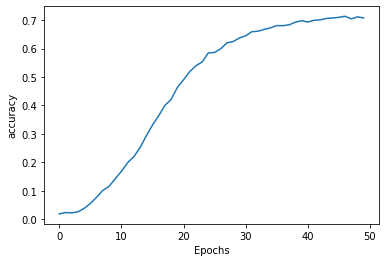

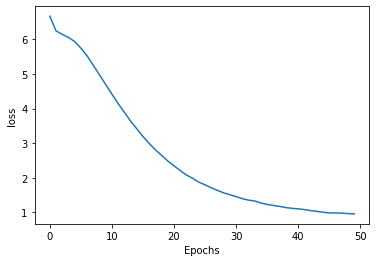

In [53]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')